# Презентационный проект по Логистической Регрессии.
**Задача.** 

Создать модель классификации для предсказания того, есть ли у пациента признаки болезни сердца, в зависимости от физических характеристик этого человека (возраст, пол, холистерол и т.д.)

**Информация об атрибутах:**

* age - возраст
* sex - пол
* cp - chest pain - тип боли в груди (4 значения)
* trestbps - resting blood pressure - давление в состоянии покоя
* chol - уровень холестерина в крови, в mg/dl
* fbs - fasting blood sugar - уровень сахара в крови, > 120 mg/dl
* restecg - resting electrocardiographic results - результаты электрокардиограммы (значнеия 0,1,2)
* thalach - максимальный пульс
* exang - exercise induced angina - возникновение ангины в результате упражнений
* oldpeak = пиковые значения в электрокардиограмме, как результат упражнений (по сравнению с состоянием покоя)
* slope - наклон пикового значения в электрокардиограмме, как результат упражнений (по сравнению с состоянием покоя)
* ca - количество крупных сосудов (0-3) окрашенных флурозопией
* thal - 3 = нормально; 6 = фиксированный дефект; 7 = обратимый дефект
* target - 0 означает отсутствие заболевания сердца, 1 означает наличие заболевания сердца

**Импорт библиотек.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Импорт DataFrame.**

In [2]:
df = pd.read_csv('Logistic_Regression_Project_Data.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
X = df.drop('target', axis=1)

In [4]:
y = df['target']

**Проверка на наличие отсутвующих значений.**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Поиск корреляции.**

Просмотр карты на наличие корреляции между Целевой переменной и частным признаком.

<Axes: >

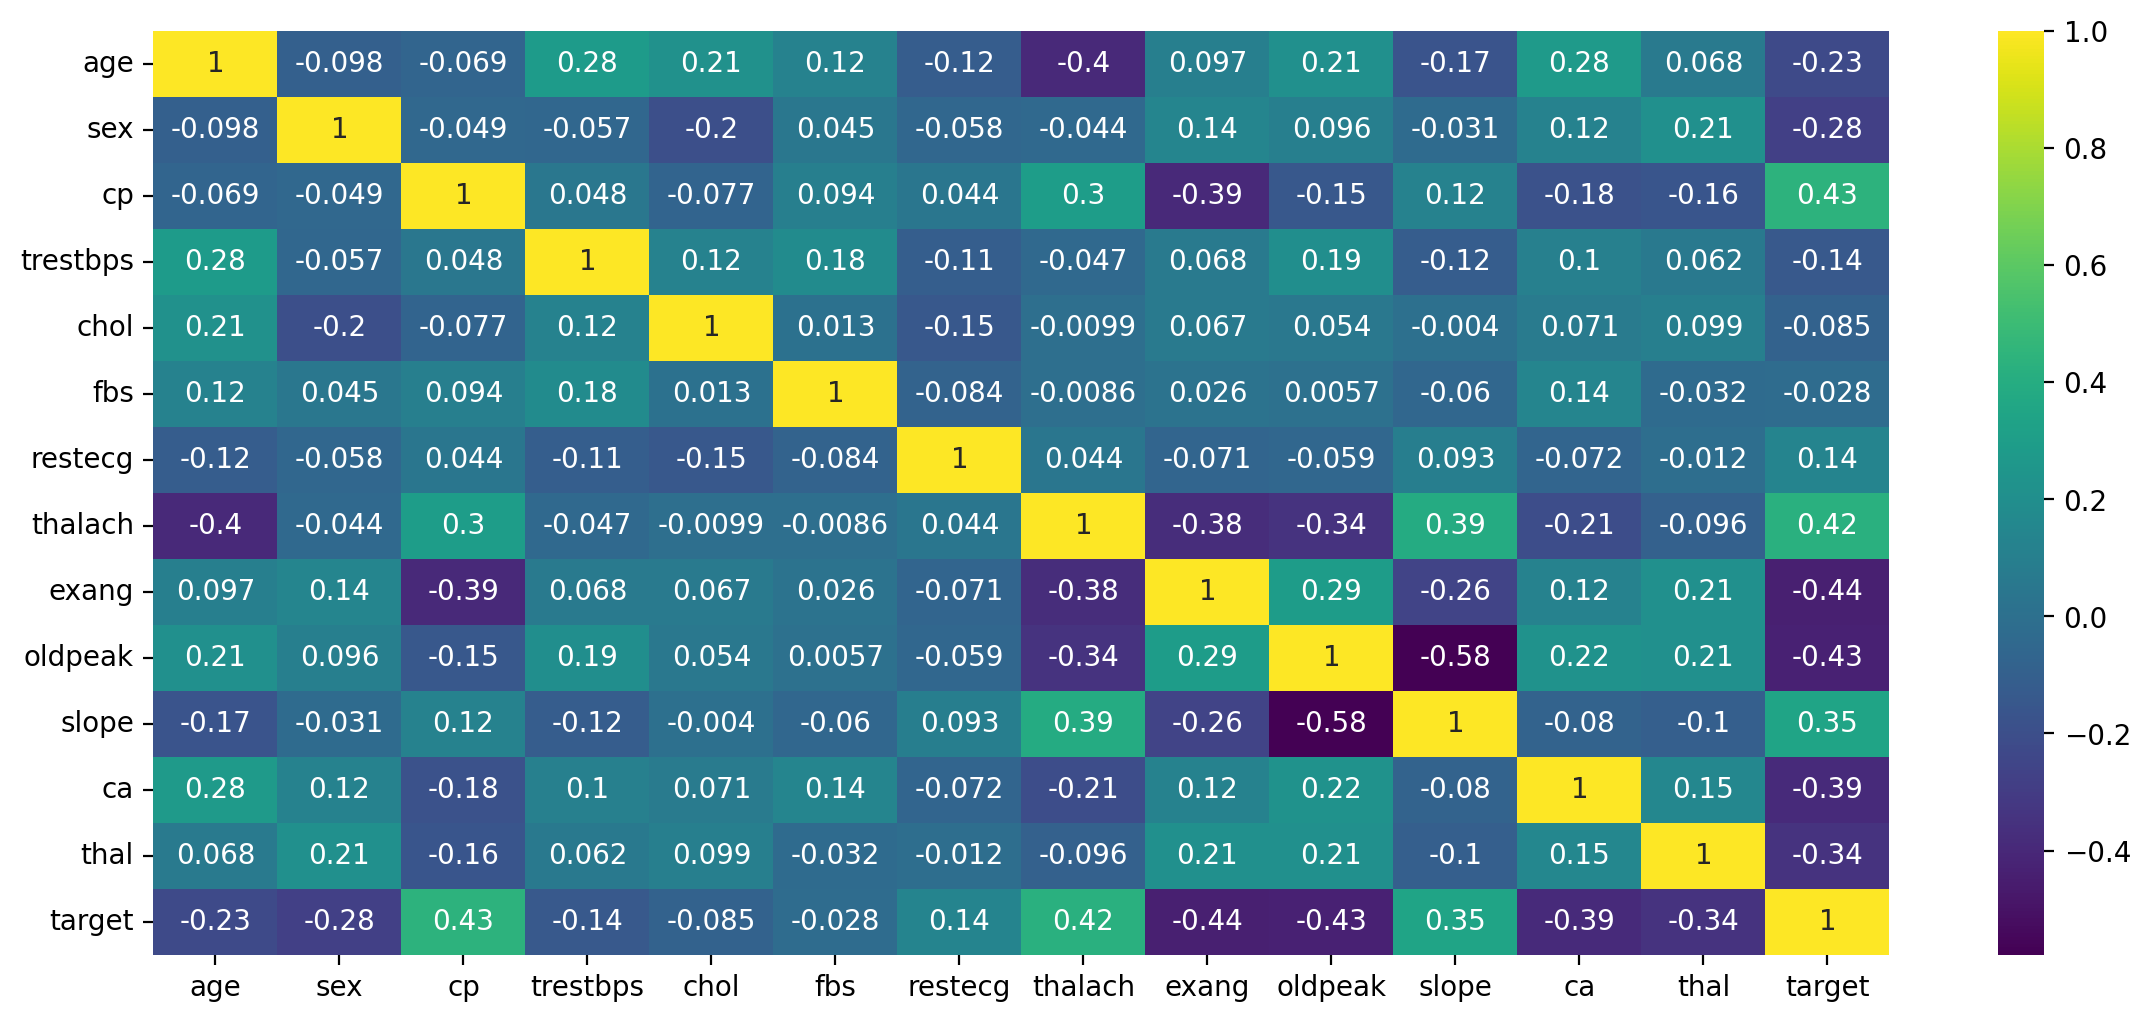

In [6]:
plt.figure(figsize=(14,6), dpi=200)
sns.heatmap(df.corr(), annot=True, cmap='viridis')

**Обучение Модели.**

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**Масштабирование Модели.**

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
scaled_X_train = scaler.fit_transform(X_train)

In [12]:
scaled_X_test = scaler.transform(X_test)

**Обучение Модели.**

In [13]:
from sklearn.linear_model import LogisticRegressionCV

In [14]:
log_model = LogisticRegressionCV()

In [15]:
log_model.fit(scaled_X_train, y_train)

LogisticRegressionCV()

**Работа с коэффициентами.**

Сравнение коэффициентов с целью сравнения и выявления наиболее важных признаков

Признак Cp - chest pain - боль в груди, является наиважнейшим.

In [16]:
log_model.coef_

array([[-0.09621199, -0.39460154,  0.53534731, -0.13850191, -0.08830462,
         0.02487341,  0.08083826,  0.29914053, -0.33438151, -0.352386  ,
         0.25101033, -0.49735752, -0.37448551]])

In [17]:
coefs = pd.Series(index=X.columns, data=log_model.coef_[0])
coefs

age        -0.096212
sex        -0.394602
cp          0.535347
trestbps   -0.138502
chol       -0.088305
fbs         0.024873
restecg     0.080838
thalach     0.299141
exang      -0.334382
oldpeak    -0.352386
slope       0.251010
ca         -0.497358
thal       -0.374486
dtype: float64

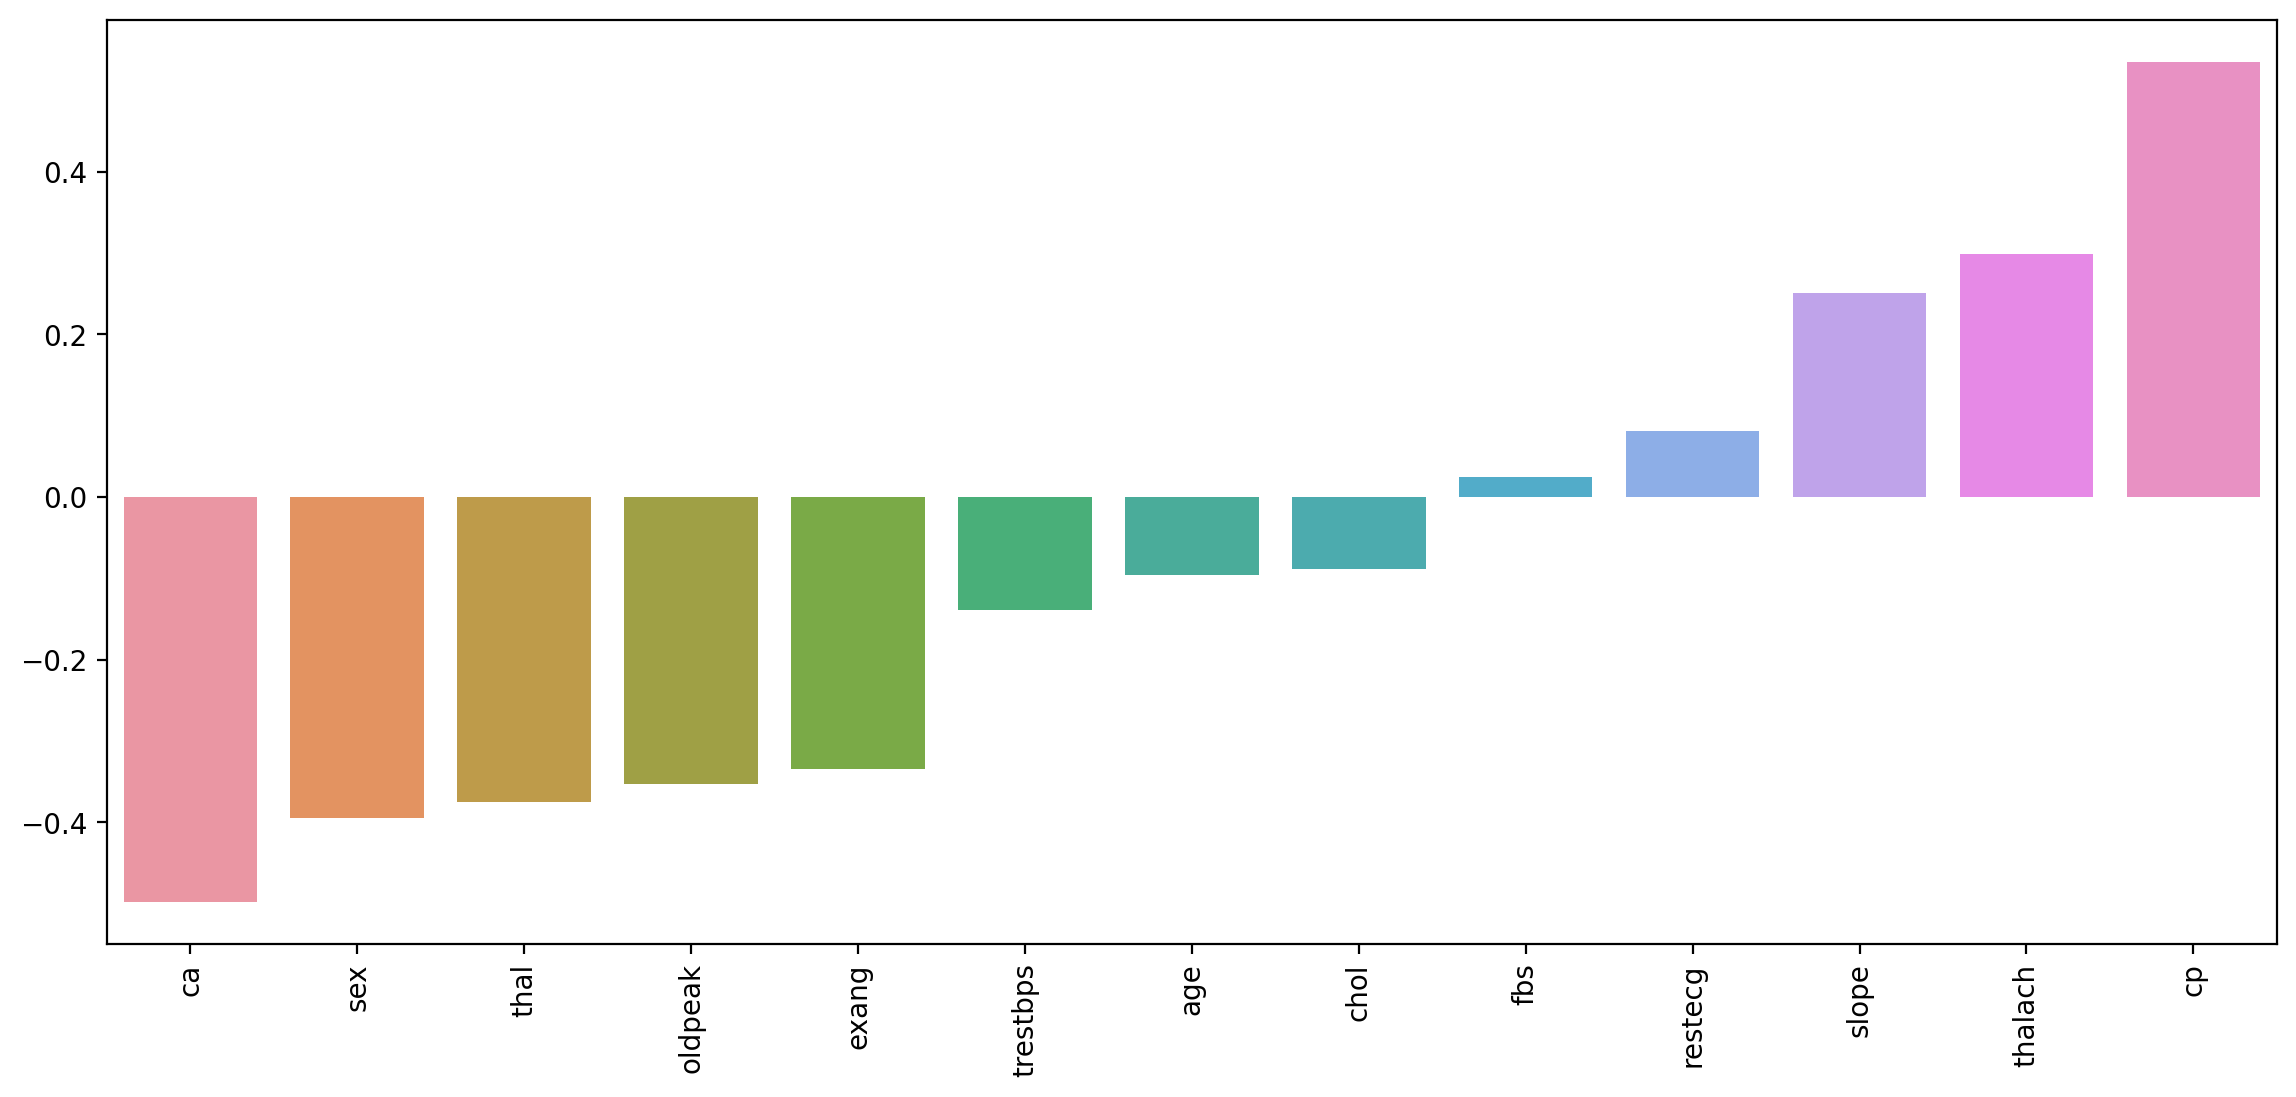

In [18]:
coefs = coefs.sort_values()
plt.figure(figsize=(14,6), dpi=200)
sns.barplot(x=coefs.index, y=coefs.values)
plt.xticks(rotation=90);

**Оценка работы модели.**

Получили 5 ошибок классификации.

Процент успешной классификации выше 80%

In [19]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [20]:
y_pred = log_model.predict(scaled_X_test)

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31


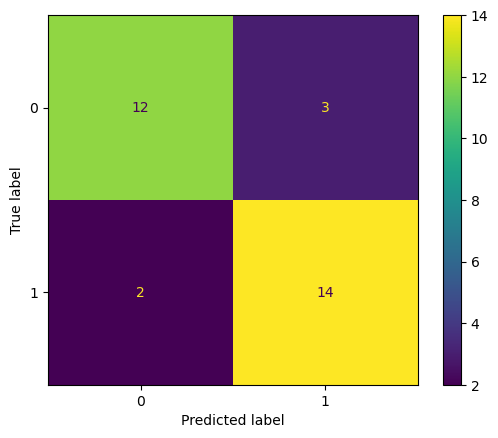

In [21]:
print(classification_report(y_test, y_pred),ConfusionMatrixDisplay.from_estimator(log_model, scaled_X_test, y_test))

**Проверка работы модели.**

Вероятность правильной классификации **94.7%**.

In [74]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [75]:
X_test.iloc[-1]

age          54.0
sex           1.0
cp            0.0
trestbps    122.0
chol        286.0
fbs           0.0
restecg       0.0
thalach     116.0
exang         1.0
oldpeak       3.2
slope         1.0
ca            2.0
thal          2.0
Name: 268, dtype: float64

In [76]:
y_test.iloc[-1]

0

In [77]:
log_model.predict(scaler.transform(patient))

C:\Users\AdminPC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [78]:
log_model.predict_proba(scaler.transform(patient))

C:\Users\AdminPC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.94751173, 0.05248827]])